In [3]:
!pip install yfinance


In [5]:
import yfinance as yf
import pandas as pd

ticker = 'AAPL'
data = yf.download(ticker, start="2018-01-01", end="2023-12-31")


[*********************100%***********************]  1 of 1 completed


In [11]:
data

Price,Close,High,Low,Open,Volume,Return,MA5,MA10,MA20,Label,Prediction
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2018-01-30,39.185345,39.279217,38.652609,38.847398,184192800,-0.005894,39.979517,40.896900,40.913563,1,0
2018-01-31,39.293293,39.530327,39.075038,39.161870,129915600,0.002755,39.660814,40.623022,40.856886,1,0
2018-02-01,39.375435,39.572569,39.136055,39.232277,188923200,0.002090,39.504514,40.353605,40.804668,0,0
2018-02-02,37.666931,39.145447,37.573059,38.957698,346375200,-0.043390,38.987737,39.932110,40.657638,0,0
2018-02-05,36.725849,38.460171,36.610852,37.338377,290954000,-0.024984,38.449371,39.450772,40.440438,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,192.192551,193.989390,191.567126,193.761051,37122800,-0.005547,193.768997,194.323940,192.260548,0,1
2023-12-26,191.646545,192.480435,191.428144,192.202472,28919300,-0.002841,193.205130,194.311034,192.422363,1,0


In [6]:
data['Return'] = data['Close'].pct_change()
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['Label'] = data['Close'].shift(-1) > data['Close'] 
data['Label'] = data['Label'].astype(int) 

data.dropna(inplace=True)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Return', 'MA5', 'MA10', 'MA20']
X = data[features]
y = data['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
X_train

array([[-0.60988974,  0.87131081,  0.88249367,  0.98266365],
       [-0.25392179,  0.45036267,  0.50291362,  0.6148252 ],
       [-3.23114741, -0.98138241, -0.91211669, -0.82583127],
       ...,
       [ 0.16770197,  0.46001881,  0.44185743,  0.39153921],
       [ 0.08882298,  1.49282419,  1.43771023,  1.3424588 ],
       [ 0.6903383 ,  0.79330811,  0.75114898,  0.68226769]])

In [14]:
y_train

Date
2022-09-16    1
2022-06-22    1
2020-03-20    0
2019-10-28    0
2023-12-13    1
             ..
2022-07-27    1
2023-03-22    1
2021-06-30    1
2023-11-15    1
2022-07-21    0
Name: Label, Length: 1192, dtype: int32

In [16]:
X_test

array([[-0.07972561,  0.73539397,  0.68878128,  0.66019247],
       [ 0.27114405, -1.22513219, -1.23646186, -1.24363015],
       [-0.55377326, -1.3230102 , -1.32678003, -1.32688522],
       ...,
       [-0.73621441,  1.24196512,  1.29859886,  1.30731314],
       [-0.23752962,  0.76012994,  0.76019925,  0.7257697 ],
       [-1.14485575,  0.77197751,  0.7204168 ,  0.73041142]])

In [17]:
y_test

Date
2021-10-25    1
2019-04-05    1
2019-02-28    1
2021-02-26    1
2019-10-01    0
             ..
2022-08-16    1
2023-04-13    0
2023-10-25    0
2021-11-04    1
2022-11-21    1
Name: Label, Length: 298, dtype: int32

In [8]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)


In [9]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))

print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy: 0.5604026845637584
KNN Accuracy: 0.4664429530201342
Logistic Regression Accuracy: 0.5671140939597316

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.07      0.13       136
           1       0.55      0.97      0.71       162

    accuracy                           0.56       298
   macro avg       0.61      0.52      0.42       298
weighted avg       0.61      0.56      0.44       298



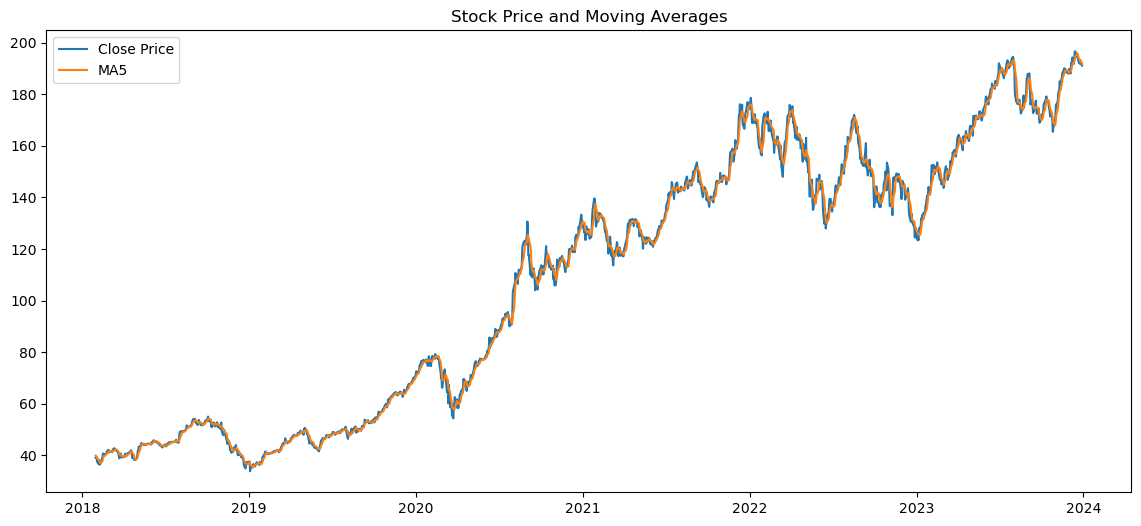

In [10]:
import matplotlib.pyplot as plt

data['Prediction'] = 0
data.iloc[-len(y_test):, data.columns.get_loc('Prediction')] = svm_pred

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA5'], label='MA5')
plt.title('Stock Price and Moving Averages')
plt.legend()
plt.show()
